In [1]:
import pandas as pd

# Specify the file path with the correct syntax
file_path = r"C:\Users\Gaurav's HP Laptop\OneDrive\Desktop\CMF\LLOY.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the entire DataFrame
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,68.199997,68.730003,67.430000,67.699997,49.539246,125462019
1,2018-01-03,67.809998,67.889999,67.220001,67.470001,49.370953,109305648
2,2018-01-04,68.029999,68.440002,67.550003,68.059998,49.802677,115241609
3,2018-01-05,68.260002,68.260002,67.709999,68.070000,49.809986,125031209
4,2018-01-08,68.360001,68.430000,67.930000,68.059998,49.802677,86290911
...,...,...,...,...,...,...,...
500,2019-12-20,64.199997,64.330002,62.330002,62.330002,50.645279,362116302
501,2019-12-23,62.000000,62.480000,61.770000,62.200001,50.539646,284390412
502,2019-12-24,62.490002,63.750000,62.349998,63.419998,51.530930,64065960
503,2019-12-27,64.000000,64.510002,62.959999,63.180000,51.335930,77395979


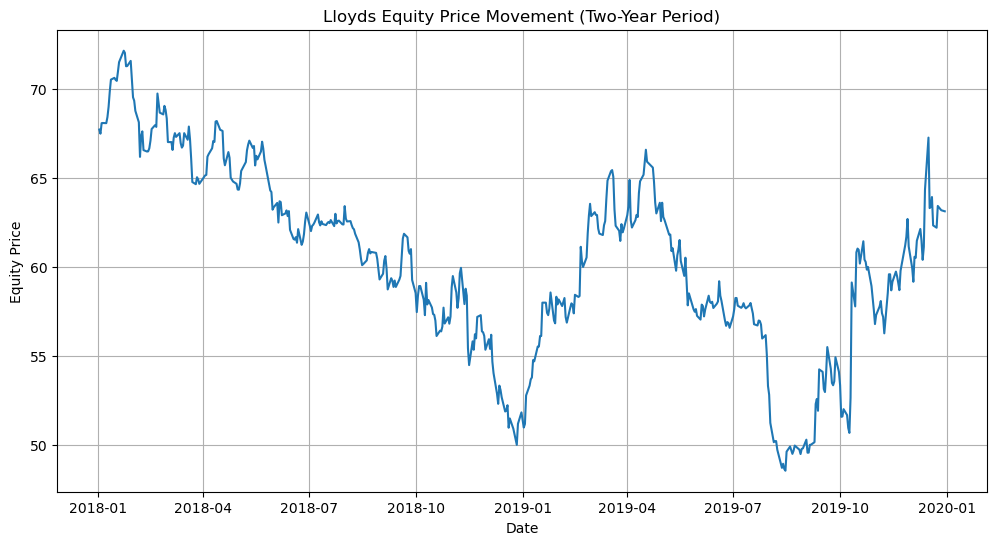

Annualized Average Return: -0.93%
Annualized Standard Deviation: 22.85%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path
file_path =  r"C:\Users\Gaurav's HP Laptop\OneDrive\Desktop\CMF\LLOY.csv"

# Read the data into a DataFrame
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot the equity price movement
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Lloyds Equity Price Movement (Two-Year Period)')
plt.xlabel('Date')
plt.ylabel('Equity Price')
plt.grid(True)
plt.show()

# Calculate the annualized average return
returns = data['Close'].pct_change()
annualized_return = ((1 + returns.mean())**252) - 1

# Calculate the annualized standard deviation
annualized_std = returns.std() * (252**0.5)

print(f"Annualized Average Return: {annualized_return:.2%}")
print(f"Annualized Standard Deviation: {annualized_std:.2%}")


C:\Users\Gaurav's HP Laptop\AppData\Local\Temp\ipykernel_3852\1447029358.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log Returns'] = np.log(filtered_df['Close'] / filtered_df['Close'].shift(1))


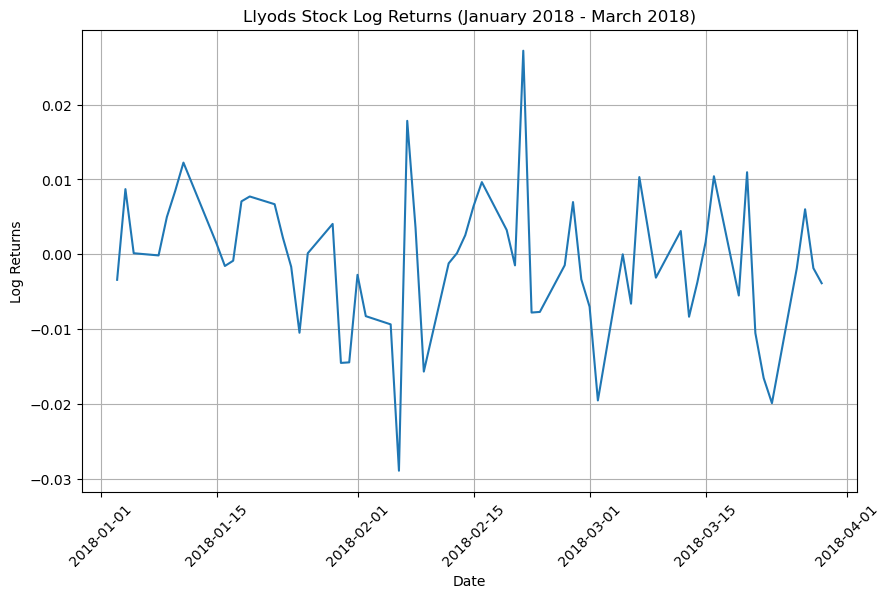

In [16]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the file path
file_path = r"C:\Users\Gaurav's HP Laptop\OneDrive\Desktop\CMF\LLOY.csv"

# Check if the file exists before trying to open it
try:
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
        
        # Create a pandas DataFrame from the CSV data
        df = pd.DataFrame(data[1:], columns=data[0])
        
        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Convert 'Close' column to float format
        df['Close'] = df['Close'].astype(float)
        
        # Filter data for the specified date range
        start_date = pd.to_datetime('2018-01-01')
        end_date = pd.to_datetime('2018-03-31')
        filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
        
        # Calculate log returns
        filtered_df['Log Returns'] = np.log(filtered_df['Close'] / filtered_df['Close'].shift(1))
        
        # Plot figure
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_df['Date'], filtered_df['Log Returns'])
        plt.xlabel('Date')
        plt.ylabel('Log Returns')
        plt.title('Llyods Stock Log Returns (January 2018 - March 2018)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
        
except FileNotFoundError:
    print(f"File not found: {file_path}")
    
except Exception as e:
    print(f"An error occurred: {e}")

In [17]:
import datetime

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2018, 3, 31)

days_to_expiration = (end_date - start_date).days
t = days_to_expiration / 365

In [18]:
import csv
import numpy as np

# Specify the file path
file_path = r"C:\Users\Gaurav's HP Laptop\OneDrive\Desktop\CMF\LLOY.csv"

# Initialize a list to store the closing prices
closing_prices = []

# Check if the file exists before trying to open it
try:
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            date = row[0]  # Assuming the date is in the first column
            if '01/01/2018' <= date <= '31/03/2018':
                closing_price = float(row[4])  # Assuming the closing price is in the 5th column
                closing_prices.append(closing_price)
            elif date > '31/03/2018':
                break
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Calculate the daily returns
returns = [(closing_prices[i] - closing_prices[i-1]) / closing_prices[i-1] * 100 for i in range(1, len(closing_prices))]

# Calculate the standard deviation of the daily returns
volatility = np.std(returns)

print("Volatility:", volatility)

Volatility: 1.4376850838653312


In [19]:
import numpy as np

# Binomial Tree Method
def calculate_option_price(S, K, r, T, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize the stock prices at each node of the tree
    stock_prices = np.zeros((n+1, n+1))
    stock_prices[0, 0] = S

    # Calculate the stock prices at each node of the tree
    for i in range(1, n+1):
        for j in range(i+1):
            stock_prices[i, j] = S * (u ** j) * (d ** (i-j))

    # Initialize the option prices at each node of the tree
    option_prices = np.zeros((n+1, n+1))

    # Calculate the option prices at each node of the tree
    for j in range(n+1):
        option_prices[n, j] = max(stock_prices[n, j] - K, 0)

    # Calculate the option prices at each node of the tree (backwards)
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_prices[i, j] = np.exp(-r * dt) * (p * option_prices[i+1, j] + (1-p) * option_prices[i+1, j+1])

    # Return the option price at time 0 and the entire option price array
    return option_prices[0, 0]


# Define parameters
S = 67.7
K = 70
r = 0.01
sigma = 1.43

T = 77/365  # Time period in years
n = 3  # Number of time steps for binomial tree method

# Calculate European call option price using binomial tree method
option_price = calculate_option_price(S, K, r, T, sigma, n)

print("European Call Option Price (Binomial Tree Method):", option_price)

European Call Option Price (Binomial Tree Method): 41.731839990107396


In [22]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 67.7
K = 70
r = 0.01
sigma = 1.43
T = 77/365

# Calculate d1 using the Black-Scholes formula
d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate delta using the cumulative distribution function of the standard normal distribution
delta = norm.cdf(d1)

print("Delta:", delta)

Delta: 0.6105478032853295


In [23]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 67.7  # Stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate European call option price using the Black-Scholes-Merton formula
call_option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Calculate European put option price using the put-call parity relationship
put_option_price = call_option_price - S + K * np.exp(-r * T)

print("European Call Option Price (Black-Scholes-Merton Method):", call_option_price)
print("European Put Option Price (Black-Scholes-Merton Method):", put_option_price)

European Call Option Price (Black-Scholes-Merton Method): 20.064614913850534
European Put Option Price (Black-Scholes-Merton Method): 22.217099334307008


In [24]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 67.7  # Stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate delta for a call option
call_delta = norm.cdf(d1)

# Calculate delta for a put option
put_delta = call_delta - 1

print("Call Delta:", call_delta)
print("Put Delta:", put_delta)

Call Delta: 0.6105478032853295
Put Delta: -0.38945219671467046


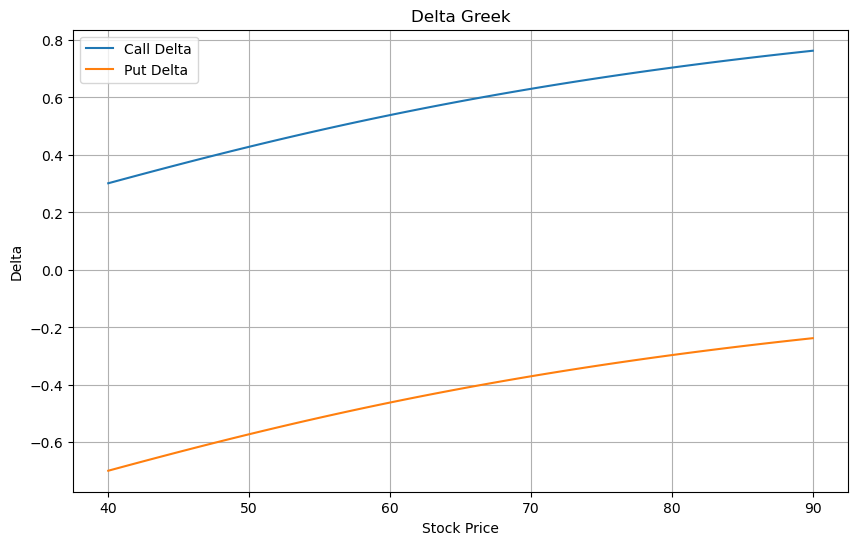

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate delta for a call option
call_delta = norm.cdf(d1)

# Calculate delta for a put option
put_delta = call_delta - 1

# Plot the delta values
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_delta, label='Call Delta')
plt.plot(S_range, put_delta, label='Put Delta')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta Greek')
plt.legend()
plt.grid(True)
plt.show()

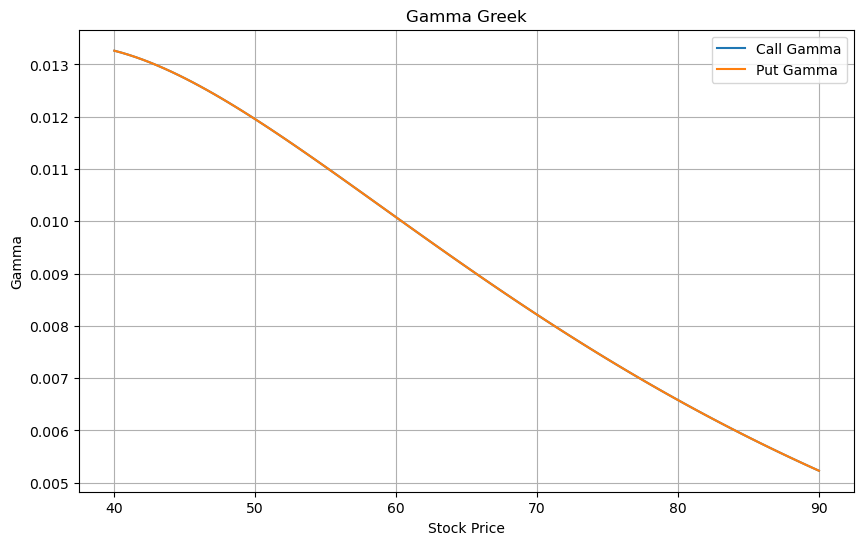

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate gamma for a call option
call_gamma = norm.pdf(d1) / (S_range * sigma * np.sqrt(T))

# Calculate gamma for a put option
put_gamma = call_gamma

# Plot the gamma values
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_gamma, label='Call Gamma')
plt.plot(S_range, put_gamma, label='Put Gamma')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma Greek')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
import numpy as np
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate gamma for a call option
gamma = (norm.pdf(d1)) / (S * sigma * np.sqrt(T))

print("Gamma:", gamma)

Gamma: 0.00862523859008498


In [28]:
import numpy as np
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate gamma for a call option
gamma_call = (norm.pdf(d1)) / (S * sigma * np.sqrt(T))

# Calculate gamma for a put option
gamma_put = gamma_call

print("Gamma for Call Option:", gamma_call)
print("Gamma for Put Option:", gamma_put)

Gamma for Call Option: 0.00862523859008498
Gamma for Put Option: 0.00862523859008498


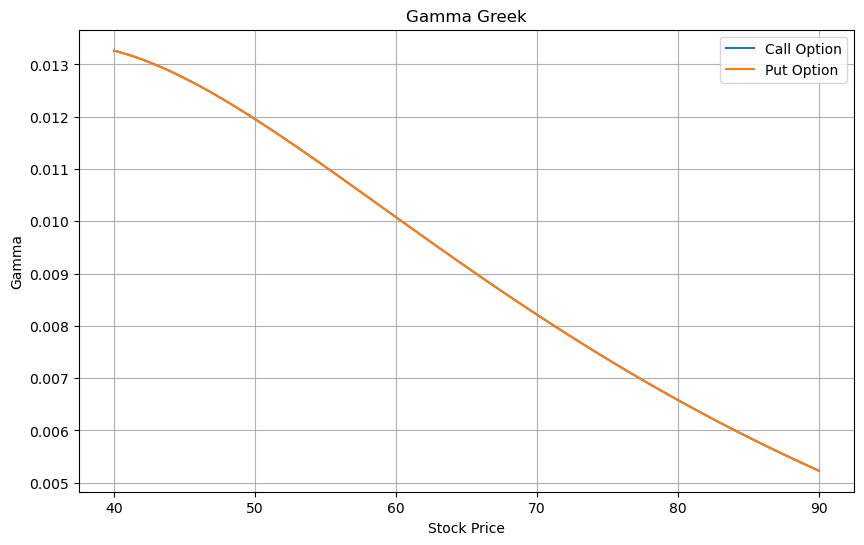

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate gamma for a call option
gamma_call = norm.pdf(d1) / (S_range * sigma * np.sqrt(T))

# Calculate gamma for a put option
gamma_put = gamma_call

# Plot the gamma values
plt.figure(figsize=(10, 6))
plt.plot(S_range, gamma_call, label='Call Option')
plt.plot(S_range, gamma_put, label='Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma Greek')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
import numpy as np
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate theta for a call option
theta_call = (-S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

# Calculate theta for a put option
theta_put = (-S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

print("Theta for Call Option:", theta_call)
print("Theta for Put Option:", theta_put)

Theta for Call Option: -40.666347550356704
Theta for Put Option: -39.967822706152134


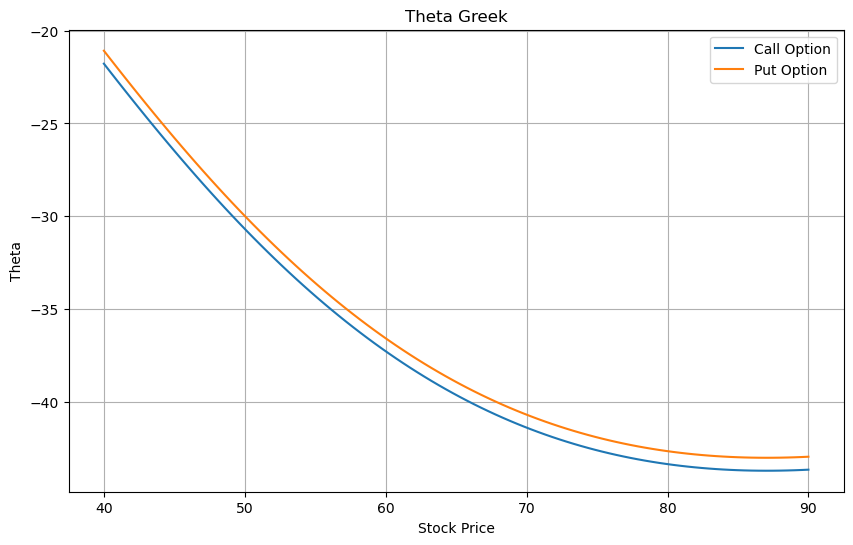

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate theta for a call option
theta_call = (-S_range * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

# Calculate theta for a put option
theta_put = (-S_range * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

# Plot the theta values
plt.figure(figsize=(10, 6))
plt.plot(S_range, theta_call, label='Call Option')
plt.plot(S_range, theta_put, label='Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.title('Theta Greek')
plt.legend()
plt.grid(True)
plt.show()

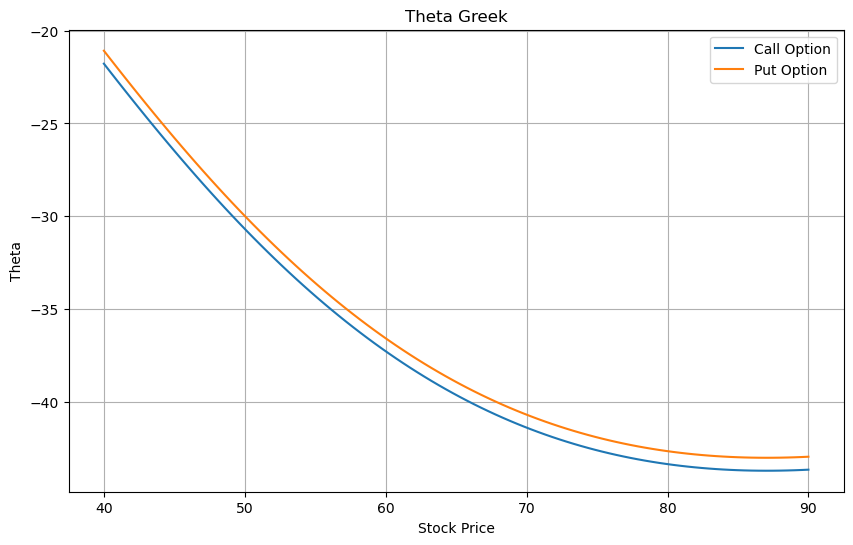

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate theta for a call option
theta_call = (-S_range * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

# Calculate theta for a put option
theta_put = (-S_range * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

# Plot the theta values
plt.figure(figsize=(10, 6))
plt.plot(S_range, theta_call, label='Call Option')
plt.plot(S_range, theta_put, label='Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.title('Theta Greek')
plt.legend()
plt.grid(True)
plt.show()

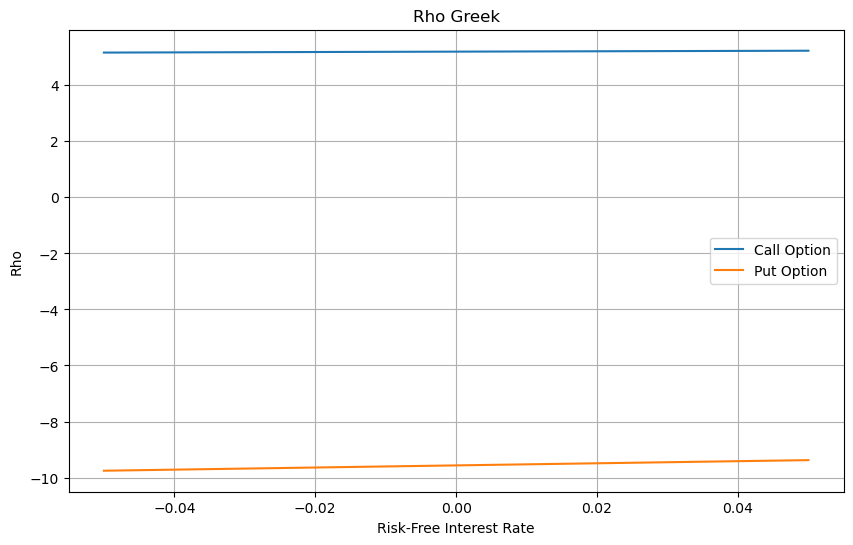

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S = 67.7  # Stock price
K = 70  # Strike price
r_min = -0.05  # Minimum risk-free interest rate
r_max = 0.05  # Maximum risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Generate a range of risk-free interest rates
n_points = 100  # Number of points on the x-axis
r_range = np.linspace(r_min, r_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r_range + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate rho for a call option
rho_call = K * T * np.exp(-r_range * T) * norm.cdf(d2)

# Calculate rho for a put option
rho_put = -K * T * np.exp(-r_range * T) * norm.cdf(-d2)

# Plot the rho values
plt.figure(figsize=(10, 6))
plt.plot(r_range, rho_call, label='Call Option')
plt.plot(r_range, rho_put, label='Put Option')
plt.xlabel('Risk-Free Interest Rate')
plt.ylabel('Rho')
plt.title('Rho Greek')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
import numpy as np
from scipy.stats import norm


# Define parameters
S = 67.7  # Stock price
K = 70  # Strike price
r_min = -0.05  # Minimum risk-free interest rate
r_max = 0.05  # Maximum risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.43  # Volatility

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate rho for a call option
rho_call = K * T * np.exp(-r * T) * norm.cdf(d2)

# Calculate rho for a put option
rho_put = -K * T * np.exp(-r * T) * norm.cdf(-d2)

print("Rho for Call Option:", rho_call)
print("Rho for Put Option:", rho_put)

Rho for Call Option: 5.208259986331055
Rho for Put Option: -9.527743576340585


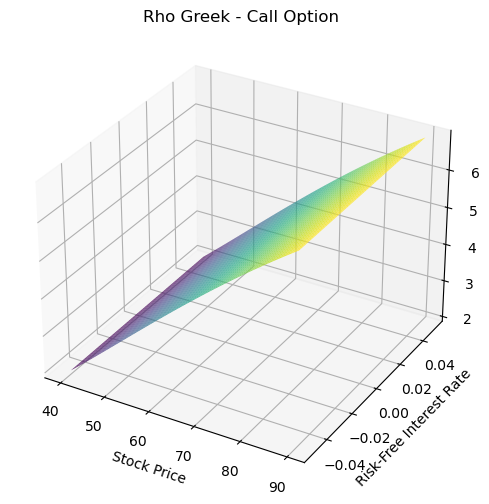

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r_min = -0.05  # Minimum risk-free interest rate
r_max = 0.05  # Maximum risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of stock prices and risk-free interest rates
n_points = 100  # Number of points on each axis
S_range = np.linspace(S_min, S_max, n_points)
r_range = np.linspace(r_min, r_max, n_points)

# Create a meshgrid of stock prices and risk-free interest rates
S_mesh, r_mesh = np.meshgrid(S_range, r_range)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_mesh / K) + (r_mesh + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate rho for a call option
rho_call = K * T * np.exp(-r_mesh * T) * norm.cdf(d2)

# Calculate rho for a put option
rho_put = -K * T * np.exp(-r_mesh * T) * norm.cdf(-d2)

# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the rho values for the call option
ax.plot_surface(S_mesh, r_mesh, rho_call, cmap='viridis', alpha=0.8)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Risk-Free Interest Rate')
ax.set_zlabel('Rho')
ax.set_title('Rho Greek - Call Option')

plt.show()

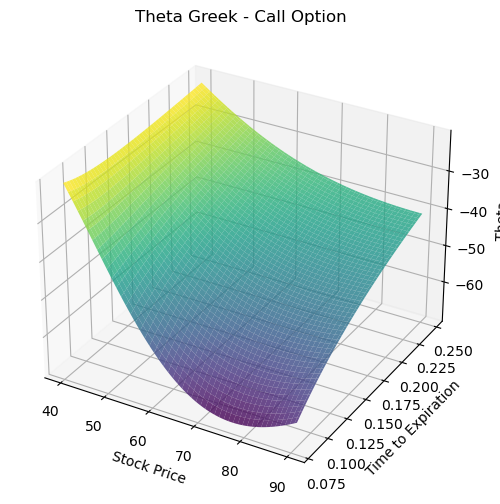

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Define parameters
S_min = 40  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T_min = 30/365  # Minimum time to expiration in years
T_max = 90/365  # Maximum time to expiration in years
sigma = 1.43  # Volatility

# Generate a range of stock prices, time to expiration, and risk-free interest rates
n_points = 100  # Number of points on each axis
S_range = np.linspace(S_min, S_max, n_points)
T_range = np.linspace(T_min, T_max, n_points)

# Create a meshgrid of stock prices, time to expiration, and risk-free interest rates
S_mesh, T_mesh = np.meshgrid(S_range, T_range)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_mesh / K) + (r + 0.5 * sigma**2) * T_mesh) / (sigma * np.sqrt(T_mesh))
d2 = d1 - sigma * np.sqrt(T_mesh)

# Calculate theta for a call option
theta_call = (-S_mesh * norm.pdf(d1) * sigma) / (2 * np.sqrt(T_mesh)) - r * K * np.exp(-r * T_mesh) * norm.cdf(d2)

# Calculate theta for a put option
theta_put = (-S_mesh * norm.pdf(d1) * sigma) / (2 * np.sqrt(T_mesh)) + r * K * np.exp(-r * T_mesh) * norm.cdf(-d2)

# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the theta values for the call option
ax.plot_surface(S_mesh, T_mesh, theta_call, cmap='viridis', alpha=0.8)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration')
ax.set_zlabel('Theta')
ax.set_title('Theta Greek - Call Option')

plt.show()